# 정적 크롤링 모듈

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

- 요청 모듈로 가져온 HTML 코드를 파이썬이 쓸 수 있는 형태로 변환해주는 역할

In [2]:
# url 정보를 url 변수에 담음
url = "http://www.naver.com"

# urlopen() 함수에서 url 정보를 담은 변수로
# 해당 url에 보내서 page 정보를 가져온 후 page 변수에 담는다
page = urlopen(url)

# html 코드 정보가 BeautifulSoup이 해석해서
# 파이썬이 사용할 수 있는 html로 변경한 후 soup 변수에 담는다.
# lxml : parser 의 한 종류이다.
# parser
# 데이터를 원하는 형태로 정보를 가공해주는 프로그램
# 특정 패턴 규칙 순서로 가공한다.
soup = BeautifulSoup(page, "lxml")

<!DOCTYPE html>
<html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:
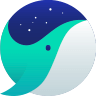
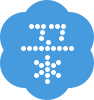

In [3]:
print(soup)

## 파서
- 내가 원하는 데이터를 특정 패턴이나 순서로 추출하여 정보를 가공해주는 프로그램
    - lxml
        - c언어로 구현되어 속도가 가장 빠르다
    - html5lib
        - 웹브라우저 형태로 HTML을 분석
        - 속도가 가장 느림
        - 가장 안정적임
    - html.parser
        - lxml 과 html5lib 의 중간 속도

## 속성 데이터

<html>
    <head>
        <title class="t" id="ti">
            test site
        </title>
    </head>
    <body>
        <p>
            test
        </p>
        <p>
            test1
        </p>
    </body>
</html>
- html
    - head
        - title
    - body
        - p
        - p

In [25]:
html = """<html> <head><title class="t" id="ti">test site</title></head> <body> <p>test</p> <p>test1</p> <p>test2</p> </body></html>"""

In [26]:
soup = BeautifulSoup(html, "lxml")

In [27]:
soup

<html> <head><title class="t" id="ti">test site</title></head> <body> <p>test</p> <p>test1</p> <p>test2</p> </body></html>

In [28]:
tag_title = soup.title
print(tag_title)
print(tag_title.attrs) # 태그의 속성 가져오기
print(tag_title["class"]) # 키가 없다면 에러 발생
print(tag_title["id"])

<title class="t" id="ti">test site</title>
{'class': ['t'], 'id': 'ti'}
['t']
ti


In [29]:
print(tag_title["class1"])

KeyError: 'class1'

In [30]:
print(tag_title.get("class1", "default_value"))

default_value


In [31]:
print(tag_title.get("class", "default_value"))

['t']


### 태그 접근
- soup.태그이름 의 형태로 첫 번째로 등장하는 태그의 정보를 가져올 수 있음

In [32]:
tag_title = soup.title # title 태그

print(tag_title)
print(tag_title.text)
print(tag_title.string)
print(tag_title.name)

<title class="t" id="ti">test site</title>
test site
test site
title


In [36]:
# text 와 string 의 차이
tag_body = soup.body

data_text = tag_body.text
data_string = tag_body.stirng

print(tag_body)
print("text :", data_text, type(data_text))
print("string :", data_string, type(data_string))

<body> <p>test</p> <p>test1</p> <p>test2</p> </body>
text :  test test1 test2  <class 'str'>
string : None <class 'NoneType'>


- text
    - 하위 태그들의 값도 모두 출력
- string
    - 정확히 해당 태그에 대한 값만 출력

In [41]:
print(tag_body.p.string)

test


## 원하는 요소에 접근하기

### find_all()
- 원하는 태그들을 리스트 형태로 가져오기

- html
    - head
        - title
    - body
        - p
        - p
        - p
        - a
        - b

In [43]:
html = html = """<html> <head><title>test site</title></head> <body> <p id="i" class="a">test1</p><p id="d" class="d">test2</p><p class="c">test3</p><a>a tag</a> <b>b tag</b></body></html>"""

In [44]:
soup = BeautifulSoup(html, "lxml")

In [46]:
print(soup.find_all("title"))

[<title>test site</title>]


In [47]:
print(soup.find_all("p"))

[<p class="a" id="i">test1</p>, <p class="d" id="d">test2</p>, <p class="c">test3</p>]


- id 값으로 태그 가져오기

In [48]:
soup.find_all(id ="d")

[<p class="d" id="d">test2</p>]

In [50]:
# id의 존재 여부로 데이터 가져오기
soup.find_all(id = True)

[<p class="a" id="i">test1</p>, <p class="d" id="d">test2</p>]

- 원하는 태그, 원하는 id 값으로 태그 가져오기

In [52]:
print(soup.find_all("p", id = "d"))

[<p class="d" id="d">test2</p>]


In [53]:
print(soup.find_all("p", id = "c"))

[]


In [55]:
print(soup.find_all("p", class_ = "d"))
print(soup.find_all("p", class_ = "c"))

[<p class="d" id="d">test2</p>]
[<p class="c">test3</p>]


In [57]:
soup.find_all("p", class_ = "c")[0].text

'test3'

## find()
- 하나의 요소만 가져옴
- 찾고자 하는 요소가 하나만 있을 때 사용
    - 예)id값으로 접근

In [58]:
print(soup.find("p", class_ = "d"))

<p class="d" id="d">test2</p>


In [59]:
print(soup.find("p", id = "i"))

<p class="a" id="i">test1</p>


In [60]:
print(soup.find(id = "i"))

<p class="a" id="i">test1</p>


In [61]:
# 연속으로 find 사용이 가능하다
soup.find("body").find("p", class_ = "d")

<p class="d" id="d">test2</p>